# Bibliotecas
- Numpy
- Pandas
- Matplotlib
- Logging um interesse transversal

## Numpy
lingua franca para troca de dados

- **ndarray** -> array multidimensional eficar que oferece operações aritméticas rápidas, orientadas a arrays.
- **funções matemáticas** -> para operações rápidas em arrays
- ferramentas para ler e escrever dados de array em disco e trabalhar com **arquivos mapeados** em memória.
- recursos de **álgebra linear**
- **API para linguagem C**

### Para análise de dados
- **operações rápidas em arrays**
- **algoritmos comuns para arrays**
- **estatísticas descritivas**

## Numpy

In [109]:
import numpy as np

In [110]:
data = np.random.randn(2,3)
data

array([[ 0.39646994,  1.37041522,  1.4413665 ],
       [ 1.04651566, -0.51878813,  1.28651206]])

In [111]:
data * 10

array([[ 3.96469944, 13.70415222, 14.41366498],
       [10.46515657, -5.18788127, 12.86512063]])

In [112]:
data + data

array([[ 0.79293989,  2.74083044,  2.882733  ],
       [ 2.09303131, -1.03757625,  2.57302413]])

In [113]:
data.shape

(2, 3)

In [114]:
data * data

array([[0.15718842, 1.87803788, 2.07753738],
       [1.09519502, 0.26914112, 1.65511329]])

In [115]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [116]:
arr[6]

6

In [117]:
arr[5:8]

array([5, 6, 7])

In [118]:
data[1][0]

1.0465156574379768

In [119]:
data.T

array([[ 0.39646994,  1.04651566],
       [ 1.37041522, -0.51878813],
       [ 1.4413665 ,  1.28651206]])

In [120]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [121]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [122]:
data2 = np.random.rand(2,3)
data2

array([[0.02148057, 0.2267984 , 0.10860553],
       [0.21315152, 0.99960179, 0.79379201]])

In [123]:
data3 = np.maximum(data, data2)
data3

array([[0.39646994, 1.37041522, 1.4413665 ],
       [1.04651566, 0.99960179, 1.28651206]])

## Pandas
Estilo idiomático do numpy

In [124]:
import pandas as pd
import sqlite3 as sql

In [125]:
df_cardio = pd.read_json('cardio.json')
df_cardio

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,NaN
3,45,117,175,282.4
4,60,102,148,406.0
5,30,98,127,300.0


In [126]:
type(df_cardio)

pandas.core.frame.DataFrame

In [127]:
type(df_cardio['Duration'])

pandas.core.series.Series

In [128]:
type(df_cardio.index)

pandas.core.indexes.base.Index

In [129]:
df_cardio.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,NaN
3,45,117,175,282.4
4,60,102,148,406.0


In [130]:
df_cardio.tail()

,Duration,Pulse,Maxpulse,Calories
1,60,117,145,479.0
2,60,103,135,NaN
3,45,117,175,282.4
4,60,102,148,406.0
5,30,98,127,300.0


In [131]:
df_cardio.Calories

0    409.1
1    479.0
2      NaN
3    282.4
4    406.0
5    300.0
Name: Calories, dtype: float64

In [132]:
# df_cardio * 3
# df_cardio / 2
df_cardio + df_cardio

,Duration,Pulse,Maxpulse,Calories
0,120,220,260,818.2
1,120,234,290,958.0
2,120,206,270,NaN
3,90,234,350,564.8
4,120,204,296,812.0
5,60,196,254,600.0


In [133]:
df_cardio.drop(columns=['Maxpulse'])

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,NaN
3,45,117,282.4
4,60,102,406.0
5,30,98,300.0


In [134]:
df_cardio.describe()

,Duration,Pulse,Maxpulse,Calories
count,6.0000,6.000000,6.000000,5.000000
mean,52.5000,107.833333,143.333333,375.300000
std,12.5499,8.084965,17.557525,82.369776
min,30.0000,98.000000,127.000000,282.400000
25%,48.7500,102.250000,131.250000,300.000000
50%,60.0000,106.500000,140.000000,406.000000
75%,60.0000,115.250000,147.250000,409.100000
max,60.0000,117.000000,175.000000,479.000000


In [135]:
df_cardio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  6 non-null      int64  
 1   Pulse     6 non-null      int64  
 2   Maxpulse  6 non-null      int64  
 3   Calories  5 non-null      float64
dtypes: float64(1), int64(3)
memory usage: 240.0 bytes


In [136]:
# df_cardio['Calories'] = df_cardio['Calories'].fillna(0)
df_cardio['Calories'] = df_cardio['Calories'].fillna(df_cardio['Calories'].mean())
df_cardio.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  6 non-null      int64  
 1   Pulse     6 non-null      int64  
 2   Maxpulse  6 non-null      int64  
 3   Calories  6 non-null      float64
dtypes: float64(1), int64(3)
memory usage: 240.0 bytes


In [137]:
df_cardio.corr()

,Duration,Pulse,Maxpulse,Calories
Duration,1.000000,0.310450,0.013615,0.790073
Pulse,0.310450,1.000000,0.634487,0.246319
Maxpulse,0.013615,0.634487,1.000000,-0.285498
Calories,0.790073,0.246319,-0.285498,1.000000


In [138]:
df_cardio.corr('spearman')

,Duration,Pulse,Maxpulse,Calories
Duration,1.000000,0.257248,0.169031,0.777542
Pulse,0.257248,1.000000,0.550782,0.231908
Maxpulse,0.169031,0.550782,1.000000,-0.142857
Calories,0.777542,0.231908,-0.142857,1.000000


In [139]:
df_cardio.cov()

,Duration,Pulse,Maxpulse,Calories
Duration,157.5,31.500000,3.000000,730.500
Pulse,31.5,65.366667,90.066667,146.720
Maxpulse,3.0,90.066667,308.266667,-369.300
Calories,730.5,146.720000,-369.300000,5427.824


#### Lendo CSV


In [140]:
df_ibov = pd.read_csv('./IBOVDia_18-06-24.csv', sep=';', skiprows=1, encoding='latin-1', index_col=False)
df_ibov.drop(df_ibov.index[-2:], inplace=True)
df_ibov.tail()


,Código,Ação,Tipo,Qtde. Teórica,Part. (%)
81,VAMO3,VAMOS,ON NM,498.860.020,"0,180"
82,VBBR3,VIBRA,ON NM,1.114.613.709,"1,147"
83,VIVA3,VIVARA S.A.,ON NM,125.912.025,"0,128"
84,WEGE3,WEG,ON NM,1.482.105.837,"2,930"
85,YDUQ3,YDUQS PART,ON NM,289.347.914,"0,159"


In [141]:
df_ibov.rename(columns={
    'Código': 'codigo',
    'Ação': 'acao',
    'Tipo': 'tipo',
    'Qtde. Teórica': 'qtde_teorica', 
    'Part. (%)': 'participacao'},
    inplace=True)

In [142]:
df_ibov.describe(include='all')

,codigo,acao,tipo,qtde_teorica,participacao
count,86,86,86,86,86
unique,86,83,18,86,83
top,RRRP3,ELETROBRAS,ON NM,238.441.689,"0,775"
freq,1,2,53,1,2


In [143]:
df_ibov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   codigo        86 non-null     object
 1   acao          86 non-null     object
 2   tipo          86 non-null     object
 3   qtde_teorica  86 non-null     object
 4   participacao  86 non-null     object
dtypes: object(5)
memory usage: 3.5+ KB


In [144]:
# df_ibov['qtde_teorica'] = pd.to_numeric(df_ibov['qtde_teorica'])

In [145]:
df_ibov['qtde_teorica'] = df_ibov['qtde_teorica'].str.replace('.','').astype(float)
df_ibov['participacao'] = df_ibov['participacao'].str.replace(',','.').astype(float)

df_ibov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   codigo        86 non-null     object 
 1   acao          86 non-null     object 
 2   tipo          86 non-null     object 
 3   qtde_teorica  86 non-null     float64
 4   participacao  86 non-null     float64
dtypes: float64(2), object(3)
memory usage: 3.5+ KB


In [146]:
#filtro
df_ibov.loc[df_ibov['participacao'] > 5]

,codigo,acao,tipo,qtde_teorica,participacao
46,ITUB4,ITAUUNIBANCO,PN N1,4.740126e+09,7.709
59,PETR4,PETROBRAS,PN EDJ N2,4.566446e+09,8.105
80,VALE3,VALE,ON NM,4.427123e+09,13.629


In [147]:
df_ibov.loc[(df_ibov['participacao'] > 2) & (df_ibov['participacao'] < 5)]

,codigo,acao,tipo,qtde_teorica,participacao
3,ABEV3,AMBEV S/A,ON,4.394246e+09,2.518
7,B3SA3,B3,ON NM,5.602790e+09,3.017
10,BBDC4,BRADESCO,PN EJ N1,5.135772e+09,3.308
12,BBAS3,BRASIL,ON EDJ NM,2.842248e+09,3.833
28,ELET3,ELETROBRAS,ON N1,1.945041e+09,3.485
45,ITSA4,ITAUSA,PN N1,5.560911e+09,2.733
58,PETR3,PETROBRAS,ON EDJ N2,2.150495e+09,4.019
84,WEGE3,WEG,ON NM,1.482106e+09,2.930


In [148]:
df_ibov.describe(include='all')

,codigo,acao,tipo,qtde_teorica,participacao
count,86,86,86,8.600000e+01,86.000000
unique,86,83,18,NaN,NaN
top,RRRP3,ELETROBRAS,ON NM,NaN,NaN
freq,1,2,53,NaN,NaN
mean,NaN,NaN,NaN,1.108983e+09,1.162791
std,NaN,NaN,NaN,1.327538e+09,1.958449
min,NaN,NaN,NaN,6.230589e+07,0.054000
25%,NaN,NaN,NaN,3.057585e+08,0.188750
50%,NaN,NaN,NaN,6.306383e+08,0.576000
75%,NaN,NaN,NaN,1.200432e+09,1.196750


In [149]:
filtro = df_ibov['participacao'] > 5
df_ibov[filtro]

,codigo,acao,tipo,qtde_teorica,participacao
46,ITUB4,ITAUUNIBANCO,PN N1,4.740126e+09,7.709
59,PETR4,PETROBRAS,PN EDJ N2,4.566446e+09,8.105
80,VALE3,VALE,ON NM,4.427123e+09,13.629


In [150]:
df_estatistica = df_ibov.describe(include='all')
type(df_estatistica)

pandas.core.frame.DataFrame

### Conexão com o banco

In [151]:
conexao = sql.connect('banco.db')
df_estatistica.to_sql('estatisticas', conexao)

ValueError: Table 'estatisticas' already exists.

In [ ]:
df_ibov.to_sql('ibov', conexao, if_exists='replace')
df_cardio.to_sql('cardio', conexao, if_exists='replace', index=False)

# Matplotlib
> Gerar visualização informativas, chamadas plotagens

<Axes: >

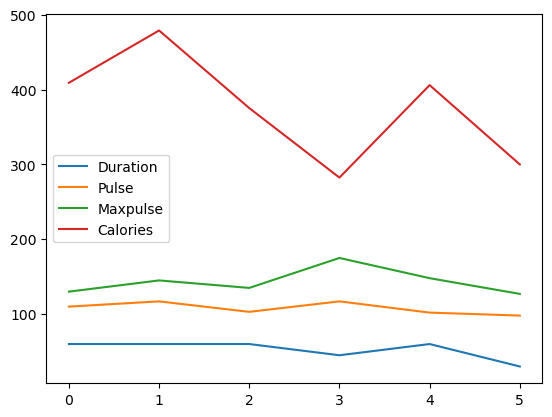

In [152]:
df_cardio.plot()

<Axes: >

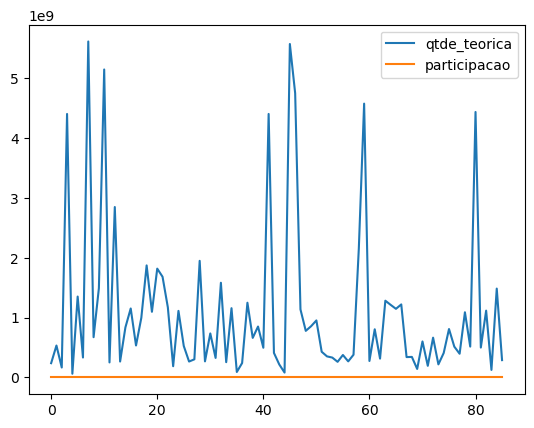

In [153]:
df_ibov.plot()

<Axes: >

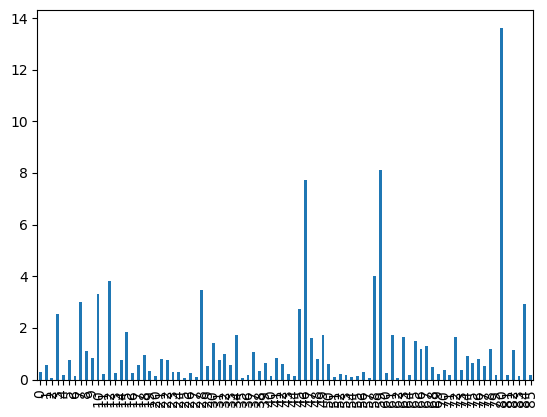

In [158]:
# df_ibov.participacao.plot()
df_ibov['participacao'].plot.bar()

In [159]:
df_tempo = pd.read_csv('https://raw.githubusercontent.com/alanjones2/dataviz/master/londonweather.csv')
df_tempo.head()

,Year,Month,Tmax,Tmin,Rain,Sun
0,1957,1,8.7,2.7,39.5,53.0
1,1957,2,9.0,2.9,69.8,64.9
2,1957,3,13.9,5.7,25.4,96.7
3,1957,4,14.2,5.2,5.7,169.6
4,1957,5,16.2,6.5,21.3,195.0


In [160]:
df_tempo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    748 non-null    int64  
 1   Month   748 non-null    int64  
 2   Tmax    748 non-null    float64
 3   Tmin    748 non-null    float64
 4   Rain    748 non-null    float64
 5   Sun     748 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 35.2 KB


In [161]:
df_tempo.to_sql('tempo', conexao, if_exists='replace', index=False)

748

In [186]:
df_tempo.corr()

,Year,Month,Tmax,Tmin,Rain,Sun
Year,1.000000,-0.010776,0.096586,0.116028,0.001069,0.051843
Month,-0.010776,1.000000,0.232060,0.305854,0.159164,-0.030693
Tmax,0.096586,0.232060,1.000000,0.976031,-0.059147,0.840275
Tmin,0.116028,0.305854,0.976031,1.000000,0.034653,0.727788
Rain,0.001069,0.159164,-0.059147,0.034653,1.000000,-0.230685
Sun,0.051843,-0.030693,0.840275,0.727788,-0.230685,1.000000


In [162]:
df_clima_2018 = pd.read_sql('select * from tempo where Year = 2018', conexao)
df_clima_2018

,Year,Month,Tmax,Tmin,Rain,Sun
0,2018,1,9.7,3.8,58.0,46.5
1,2018,2,6.7,0.6,29.0,92.0
2,2018,3,9.8,3.0,81.2,70.3
3,2018,4,15.5,7.9,65.2,113.4
4,2018,5,20.8,9.8,58.4,248.3
5,2018,6,24.2,13.1,0.4,234.5
6,2018,7,28.3,16.4,14.8,272.5
7,2018,8,24.5,14.5,48.2,182.1
8,2018,9,20.9,11.0,29.4,195.0
9,2018,10,16.5,8.5,61.0,137.0


In [163]:
df_clima_89 = pd.read_sql('select * from tempo where Year = 1989', conexao)
df_clima_89

,Year,Month,Tmax,Tmin,Rain,Sun
0,1989,1,9.5,3.1,26.0,59.2
1,1989,2,10.2,2.6,40.2,94.2
2,1989,3,12.9,4.5,56.6,100.0
3,1989,4,11.5,4.3,64.2,144.5
4,1989,5,21.0,10.0,12.1,310.1
5,1989,6,22.1,11.4,35.5,258.5
6,1989,7,25.8,14.8,36.7,274.8
7,1989,8,24.2,13.1,55.7,267.1
8,1989,9,20.7,12.6,10.8,131.2
9,1989,10,17.1,9.7,52.8,113.4


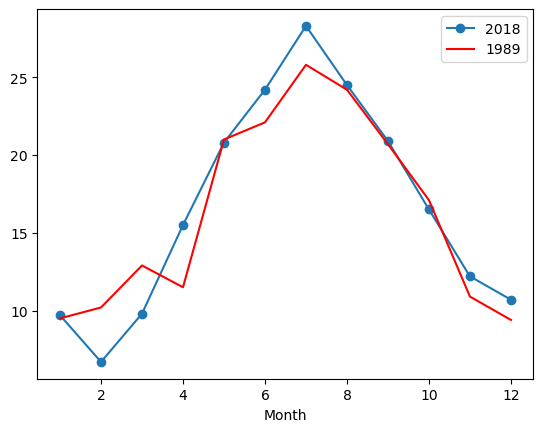

In [172]:
ax_2018 = df_clima_2018.plot(y='Tmax', marker='o', x='Month')

ax = df_clima_89.plot(y='Tmax', color='red', x='Month', ax=ax_2018, )

ax.legend(['2018', '1989'])

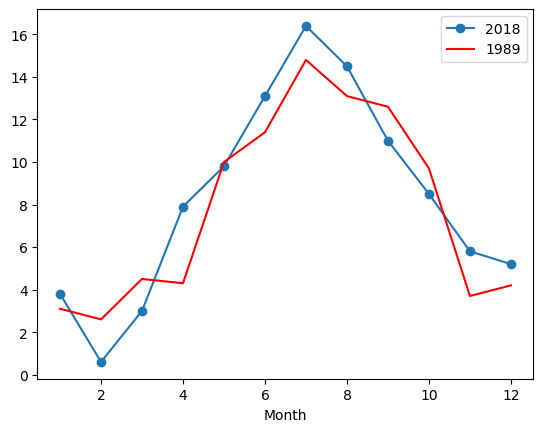

In [173]:
ax_2018 = df_clima_2018.plot(y='Tmin', marker='o', x='Month')

ax = df_clima_89.plot(y='Tmin', color='red', x='Month', ax=ax_2018, )

ax.legend(['2018', '1989'])

In [176]:
df_july = pd.read_sql('select * from tempo where Month = 7', conexao)
df_july

,Year,Month,Tmax,Tmin,Rain,Sun
0,1957,7,22.5,13.8,87.0,152.3
1,1958,7,21.7,12.9,51.9,190.5
2,1959,7,24.7,13.3,86.5,276.9
3,1960,7,20.1,12.4,67.2,139.7
4,1961,7,22.1,12.1,26.2,180.0
...,...,...,...,...,...,...
57,2014,7,25.8,15.0,50.0,246.4
58,2015,7,23.7,13.8,71.8,189.7
59,2016,7,24.0,14.5,16.0,182.8
60,2017,7,23.8,14.9,90.0,178.0


In [177]:
df_july.sort_values(by=['Tmax'], ascending=False, inplace=True)
df_july

,Year,Month,Tmax,Tmin,Rain,Sun
61,2018,7,28.3,16.4,14.8,272.5
49,2006,7,28.2,16.7,23.6,266.4
26,1983,7,27.6,16.0,50.3,247.8
56,2013,7,27.0,15.2,25.2,268.2
19,1976,7,26.6,14.9,15.4,263.5
...,...,...,...,...,...,...
9,1966,7,20.1,12.2,78.0,161.6
3,1960,7,20.1,12.4,67.2,139.7
31,1988,7,20.0,12.2,76.2,161.7
23,1980,7,19.7,11.9,59.3,163.7


<Axes: xlabel='Year'>

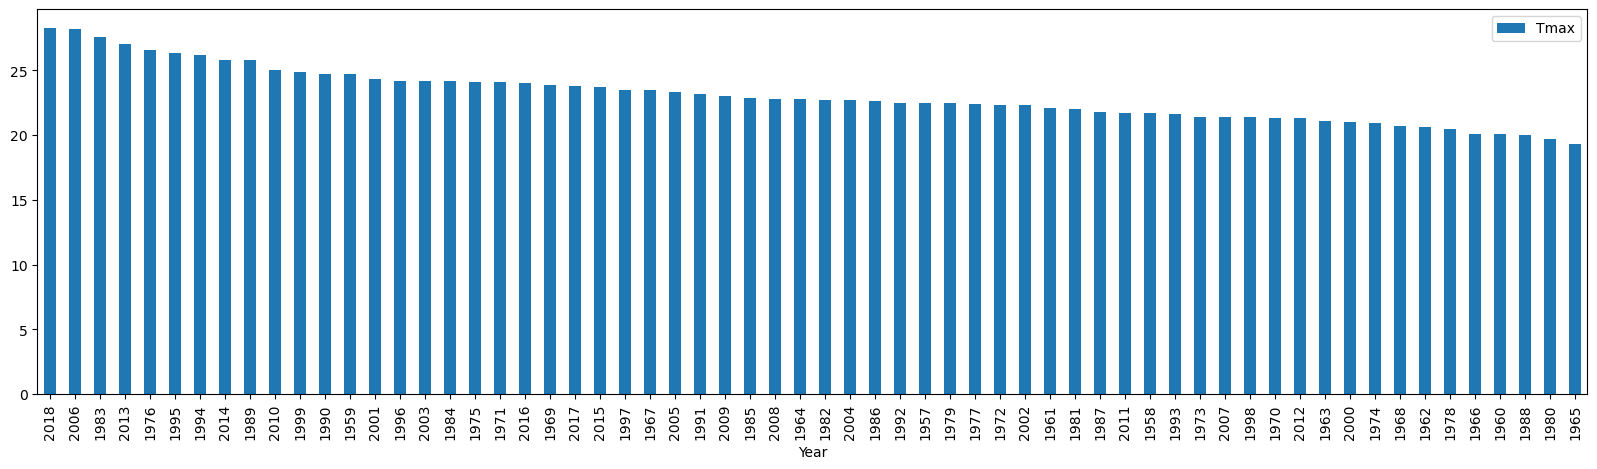

In [178]:
df_july.plot.bar(x='Year', y='Tmax', figsize=(20, 5))

In [179]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12, 6)})

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


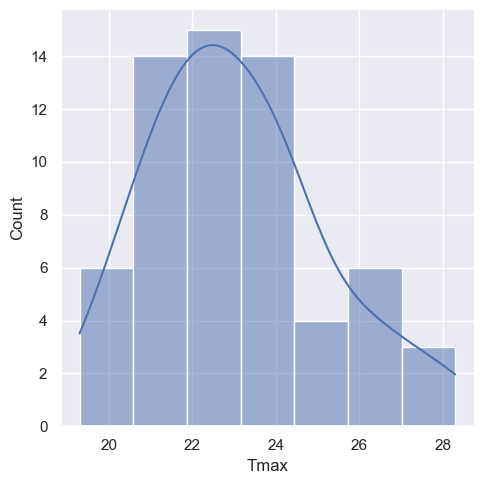

In [185]:
sns.displot(df_july['Tmax'], kde=True)

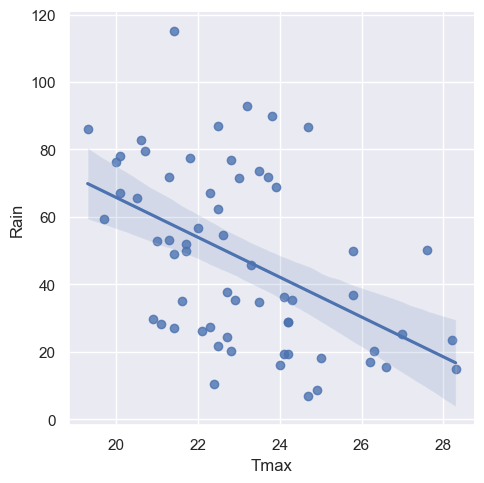

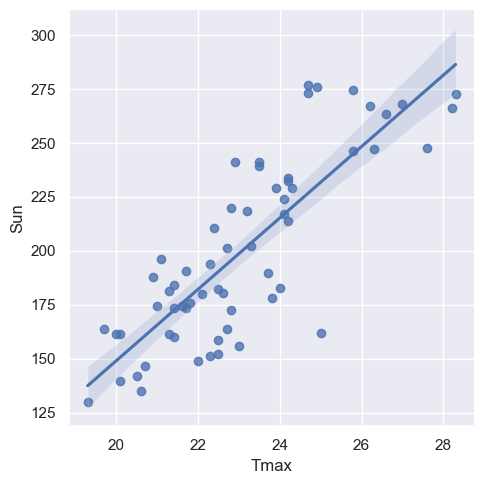

In [181]:
sns.lmplot(data=df_july, x='Tmax', y='Rain')
sns.lmplot(data=df_july, x='Tmax', y='Sun')